# Regression Trees

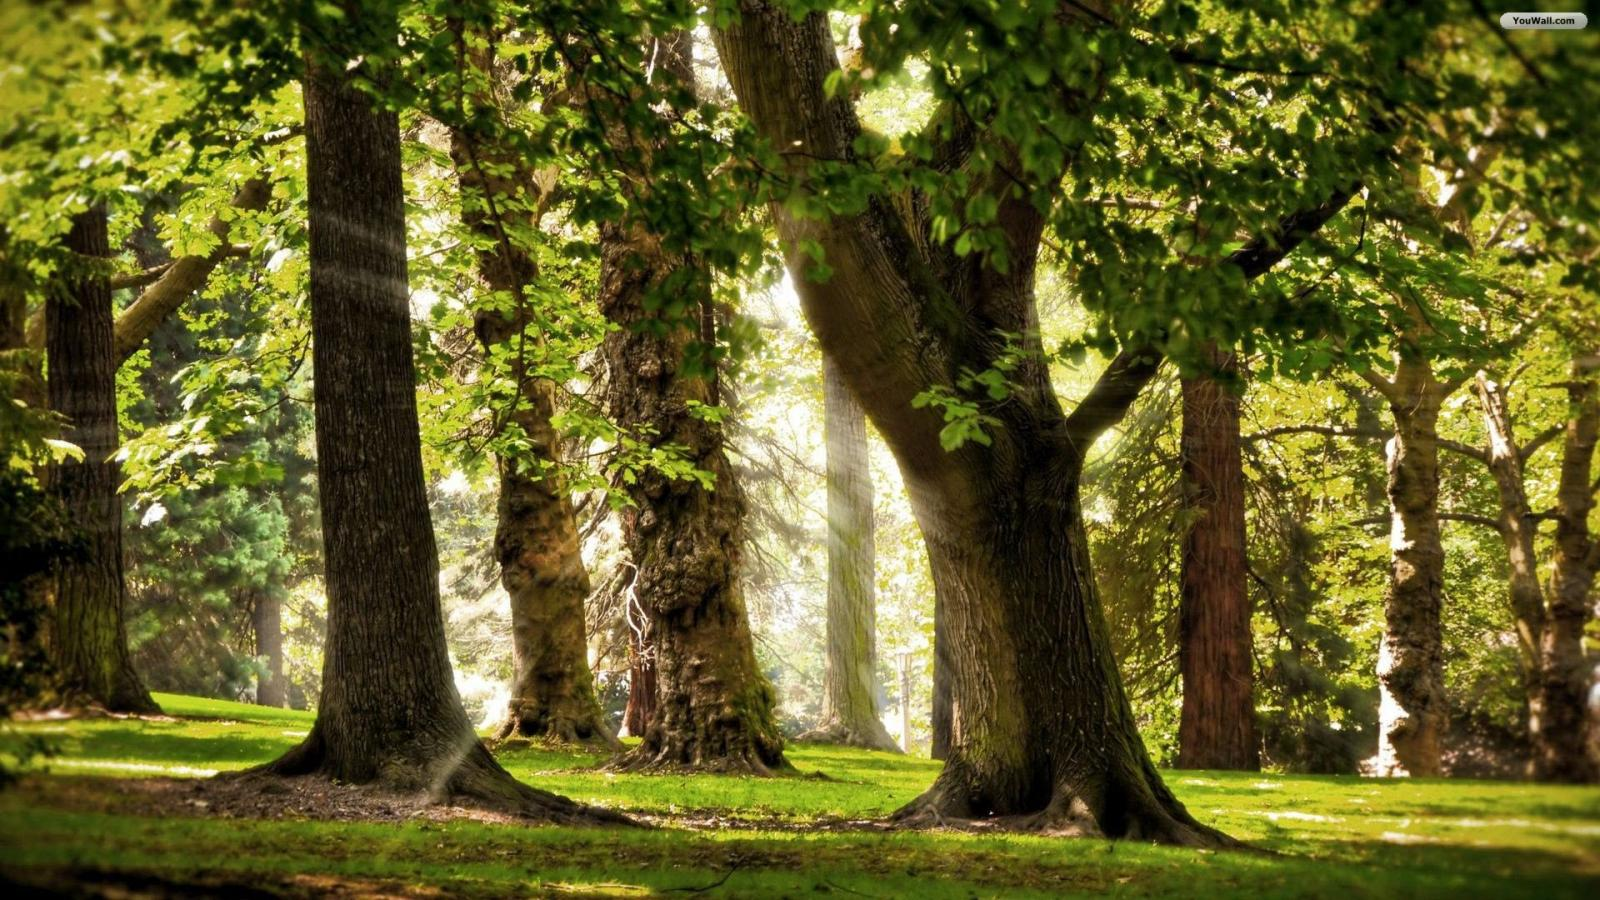

## Introduction

Prediction trees are a particular kind of nonlinear predictive model. There are two varieties: regression trees and classification trees. Of course, we will be focused on regression trees. We use linear regression as a method of making quantitative predictions. However, linear regressions do not do well with a nonlinear models. A solution to this problem can be to partition the data into smaller regions where we are able to have more manageable linear interactions. We can recursively subdivide the partitions until we get extremely manageable pieces that can be estimated with simple regression models. This process is known as recursive partitioning. Hence, we use recursive partitioning to sort the data into small, manageable sections and then use a simple model for each part of the partition. 

We can represent the recursive partitioning process using a regression tree. Thus, each terminal node of the regression tree represents a part of the partition that has an estimate found using a simple model. The estimate found applies only to the specific partition. We navigate the tree by asking a sequence of questions about specific features for some point, x. Each question, usually refers to only a single attribute with a yes or no answer. For example, a question of the type could concern gender of the observation (i.e. is the observation male or not). The variables can be either continuous or discrete (but ordered). 

For classic regression trees, the model in each cell is just a constant estimate of Y. That is, suppose the points (x1,y1), (x2,y2), …, (xc,yc) are all the samples belonging to the node x. Then our model for x is: $$\hat{y}=\frac{1}{c} \sum_{i=1}^{c}y_i$$ This is the sample mean of the dependent variable in that cell. This is a piecewise-constant model. There are several advantages to the piecewise-constant model:
					
1. Making predictions is fast, since the calculation process is not complicated
2. It’s easy to understand what variables are important in prediction (look at the tree)
3. If some data is missing, we might not be able to go all the way down the tree to a leaf, but we can still make a prediction by averaging all the leaves in the subtree we do reach
4. The model gives a jagged response, so it can work when the true regression surface is not smooth. If it is smooth, though, the piecewise-constant surface can approximate it arbitrarily closely (with enough leaves)
5. There are fast, reliable algorithms to learn these trees 						

One of the problems with clustering was that we needed to balance the informativeness of the clusters with parsimony, so as to not just put every point in its own cluster. Similarly, we could just end up putting every point in its own leaf-node, which would not be very useful. A typical stopping criterion is to stop growing the tree when further splits gives less than some minimal amount of extra information, or when they would result in nodes containing less than a small percentage of the total data.  

Regression trees can be used to address problems in which we want to predict the value of a continuous variable from a set of continuous and/or categorical variables. 

Examples:

Health (Type II Diabetes)
* Sugar Consumption (avg. grams per day) (continuous) 
* Weight (continuous)
* Number of days per week with greater than 30 minutes of exercise (categorical) 
* Age (continuous)
* Parent has diabetes (categorical) 
* Hours worked/week (continuous)

Election outcomes (voter-share) (continuous)
* State/Region (categorical)
* Campaign spending (continuous)
* Incumbent (categorical)
* Political Party (categorical)
* GDP Growth (continuous)
* General vs. Midterm Election (categorical)

Selling prices of single family homes (continuous)
* Square footage (continuous)
* Style of home (categorical)
* Zip code/county/state/etc. (categorical)
* Median income of neighborhood/zip code (if area variable is larger than zip code) (continuous)


## Analytical Framework

The basic idea behind regression trees is that each good factor (variable in ML) can be used to make a "decision" about the likelihood of an outcome. Each split is called a _node_.

For example, to predict whether a customer will buy a certain kind of computer, we might use the following simple decision tree:

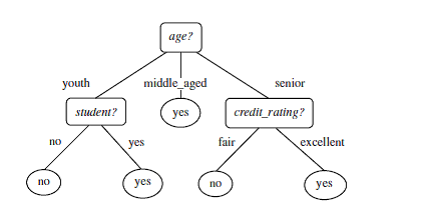

If we have enough data, we can use to train a model that will be able to use the same general idea to predict outcomes given new (similar) data.

### The Algorithm

The goal of the regression tree model is to minimize the sum of squared residuals, as in OLS regression. However, in the regression tree model, we are minimizing the sum of squared residuals for a given tree T.
The sum of squared residuals for a tree T is $$S=\sum_{c\in terminal nodes(T)}\sum_{i\in C}(y_i-m_c)^2$$ where $m_c=\frac{1}{n_c}\sum_{i\in C}y_i$, the prediction for leaf c. We make our splits to minimize S.

The Algorithm:
1. Start with a single node containing all points. Calculate $m_c$ and S. 
2. If all the points in the node have the same value for all the independent variables, stop. Otherwise, search over all binary splits of all variables for the one which will reduce S as much as possible. IF the largest decrease in S would be less than some threshold delta, or one of the resulting nodes would contain less than q points, stop. Otherwise, take that split, creating two new nodes.
3. In each new node, go back to step 1. 

A more successful approach to finding regression trees uses the idea of cross-validation. We randomly divide our data into a training set and a testing set, (say, 50% training and 50% testing). We then apply the basic tree-growing algorithm to the training data only, with q = 1 and δ = 0 — that is, we grow the largest tree we can. This is generally going to be too large and will over-fit the data. We then use cross-validation to prune the tree. At each pair of terminal nodes with a common parent, we evaluate the error on the testing data, and see whether the sum of squares would be smaller by remove those two nodes and making their parent a terminal node. This is repeated until pruning no longer improves the error on the testing data. 


### Key Concept: Gini Impurity

For now, we will start with the simplest case: a classification problem with two outcomes. A common example uses a dataset of passengers on the Titanic to predict who survives.

Ideally, we want factors that are as predictive as possible. If men and women are equally likely to survive, the variable can't tell us much (barring interaction with other variables). Fortunately (depending on your perspective, but at least for prediction purposes), it turns out women are more likely than men to survive, so _sex_ will be an important factor in our tree.

That means that a node splitting on _sex_ has relatively low Gini impurity. A factor with high purity is very predictive of the outcome. Conversely, the impurity of a node would be maximized if equal proportions of its values (males and females here) survived.

Gini impurity is formally defined as:

$$Gini_{i} = 1 - \sum_{k=1}^{n}{p_{i,k}^2}$$

For example, if it were the case that 70% of the survivors were females, the Gini impurity of the _sex_ node would be: 

$$1-0.3^2-0.7^2 = 0.42$$

In general, it makes sense to grow a tree **greedily** - starting with the purest feature splits, then moving to the next.

Overfitting is a major concern with regression trees - you might get great scores within your training set, but then find that it generalizes poorly. As is often the case with decision trees, there is a tradeoff between bias, variance, and overfitting. The shallower the tree, the greater the bias and variance, but this may be preferable to overfitting. There are several hyperparameters you can include in the model to keep this from happening, such as:

max depth

min_samples_split

min_samples_leaf

min_weight_fraction_leaf

max_leaf_nodes


### Pros and Cons of Regression Trees

Regression trees are among the easiest to visualize of ML models. They are intuitive and not hard to explain, even to someone with little econometrics training. They are computationally efficient and don't have the same problems with missing values, non-numerical or cateorical data, and collinearity.

On the downside, they often don't have the highest accuracy in prediction and can be sensitive to minor changes in data. One way to overcome these weaknesses is to use multiple decision trees aggregated (random forests, boosting) or in conjunction with other models (stacking).

The rest is from https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb. We can change it to fit our specific example, but this is a decent starting point.

<The code below is from https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb and we can change it to fit our project, but it is a decent starting point.>

## Python Setup

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## Training and visualizing

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## Predicting classes and class probabilities

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

In [ ]:
tree_clf.predict([[5, 1.5]])

## Sensitivity to training set details

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

In [ ]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()


In [ ]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

## Regression trees

In [ ]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [ ]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()